## car-knn data를 가지고 knn svm로 classification
1. 각 단계마다 주석을 달아주세요.
2. 데이터 분석 전 과정을 진행해주세요.
 - 상관도 체크, 그래프
 - train_test 분류
 - 학습 -> 최적의 모델을 찾아서
 - 모델 성능 평가

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
car_data = pd.read_csv('../data/car-knn.csv')

In [5]:
car_data.head()

,wheels,chassis,pax,vtype,class
0,1,1,1,Bike,1
1,1,1,1,Bike,1
2,1,1,1,Bike,1
3,1,1,1,Bike,1
4,1,1,1,Bike,1


### 상관도 체크 / 그래프

In [36]:
car_data.corr()

,wheels,chassis,pax,class
wheels,1.000000,0.857299,-0.084669,0.920221
chassis,0.857299,1.000000,0.309328,0.935433
pax,-0.084669,0.309328,1.000000,0.241397
class,0.920221,0.935433,0.241397,1.000000


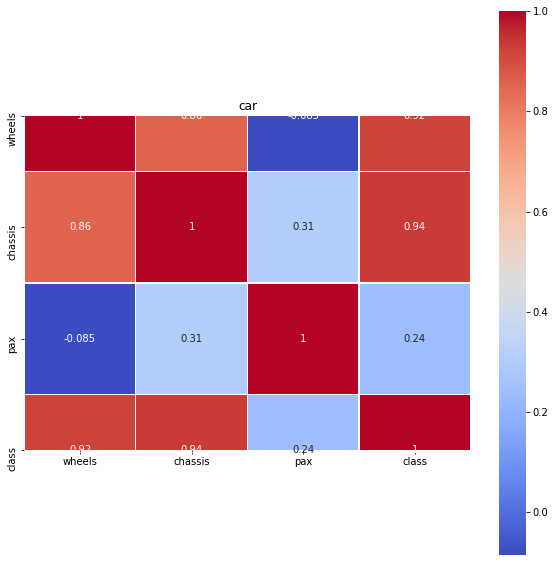

In [63]:
plt.figure(figsize=(10, 10))
sns.heatmap(car_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="white")
plt.title('car')
plt.show()

In [86]:
car_data.dtypes

wheels      int64
chassis     int64
pax         int64
vtype      object
class       int64
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


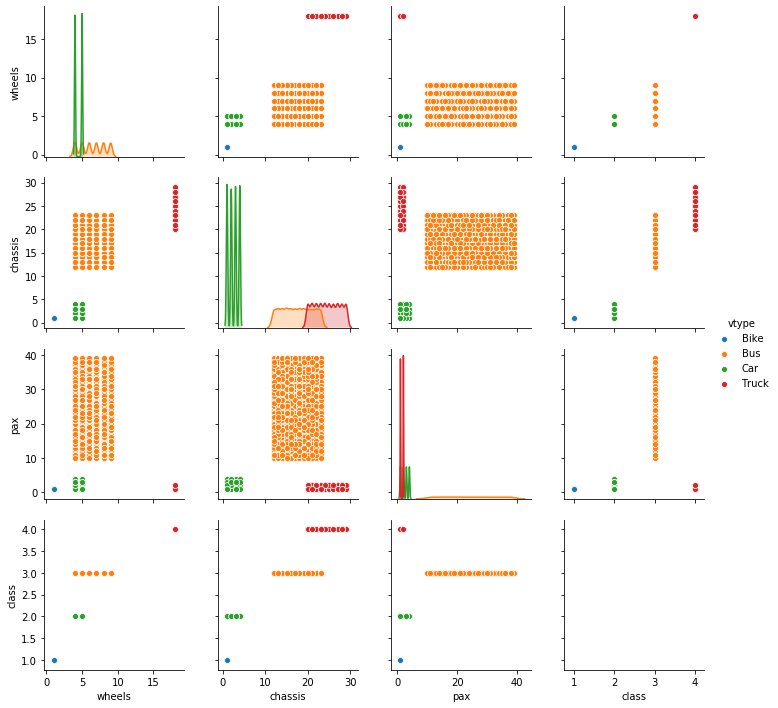

In [41]:
sns.pairplot(car_data, hue='vtype')

### train_test 분류

In [6]:
y = car_data.loc[:, 'vtype']

In [8]:
x = car_data.loc[:, ['wheels','chassis','pax','class']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, shuffle=True)

## SVC 분류 모델

In [10]:
clf=SVC()

In [11]:
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
y_pred = clf.predict(x_test)

In [13]:
print('정답률: ', accuracy_score(y_test, y_pred))

정답률:  1.0


### 모델 분류 평가

In [34]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n        Bike       1.00      1.00      1.00      4932\n         Bus       1.00      1.00      1.00      4968\n         Car       1.00      1.00      1.00      5081\n       Truck       1.00      1.00      1.00      5019\n\n    accuracy                           1.00     20000\n   macro avg       1.00      1.00      1.00     20000\nweighted avg       1.00      1.00      1.00     20000\n'

## KNN 분류 모델

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [31]:
y_pred2 = knn.predict(x_test)

In [32]:
print('정답률: ', accuracy_score(y_test, y_pred2))

정답률:  1.0


### 모델 분류 평가

In [35]:
classification_report(y_test, y_pred2)

'              precision    recall  f1-score   support\n\n        Bike       1.00      1.00      1.00      4932\n         Bus       1.00      1.00      1.00      4968\n         Car       1.00      1.00      1.00      5081\n       Truck       1.00      1.00      1.00      5019\n\n    accuracy                           1.00     20000\n   macro avg       1.00      1.00      1.00     20000\nweighted avg       1.00      1.00      1.00     20000\n'

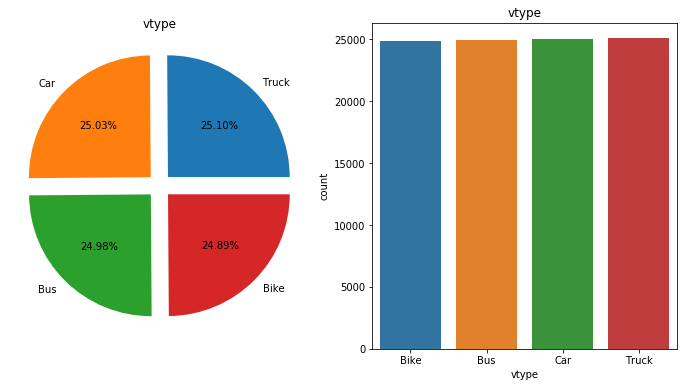

In [66]:
f,ax=plt.subplots(1,2,figsize=(12,6))

car_data['vtype'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('vtype')
ax[0].set_ylabel('')

sns.countplot('vtype', data=car_data,ax=ax[1])
ax[1].set_title('vtype')
plt.show()

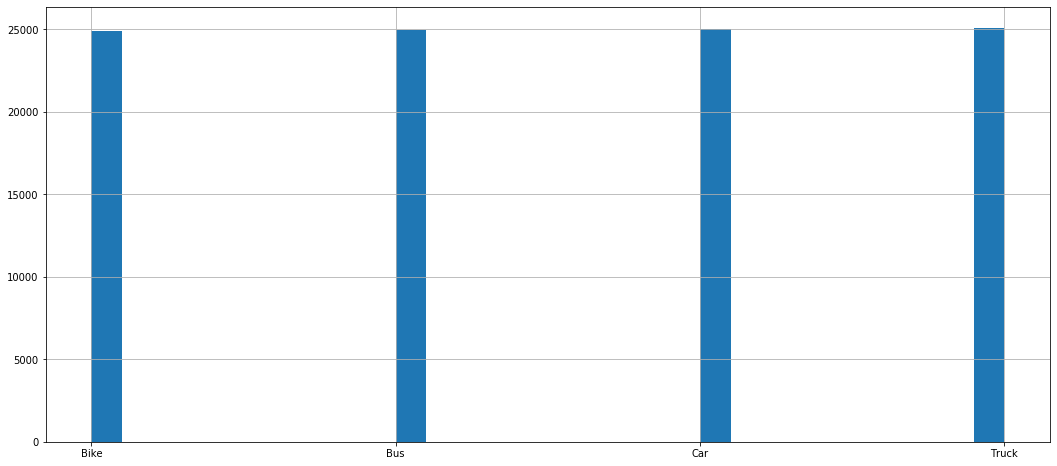

In [67]:
car_data['vtype'].hist(bins=30, figsize=(18,8))

In [69]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(x_train, y_train)

print('Scroe :', format(tree_clf.score(x_train,y_train)))

Scroe : 1.0


In [70]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(x_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  100.0


In [83]:
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file="car_decision_tree.dot",
        feature_names=['wheels','chassis','pax','class'],
        class_names=['bike','bus','car','truck'],
        rounded=True,
        filled=True
    )

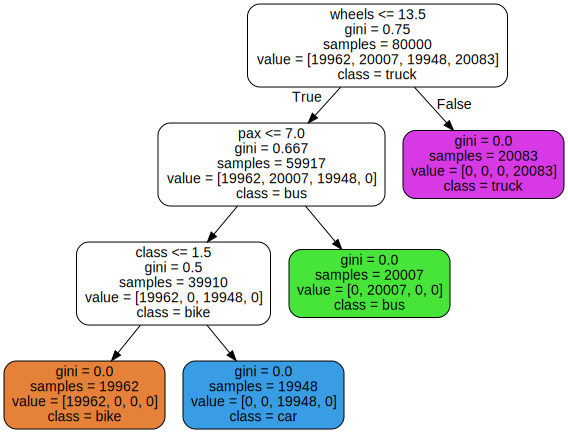

In [85]:
import graphviz
with open("car_decision_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='car_decision_tree', directory='images/decision_trees', cleanup=True)
dot